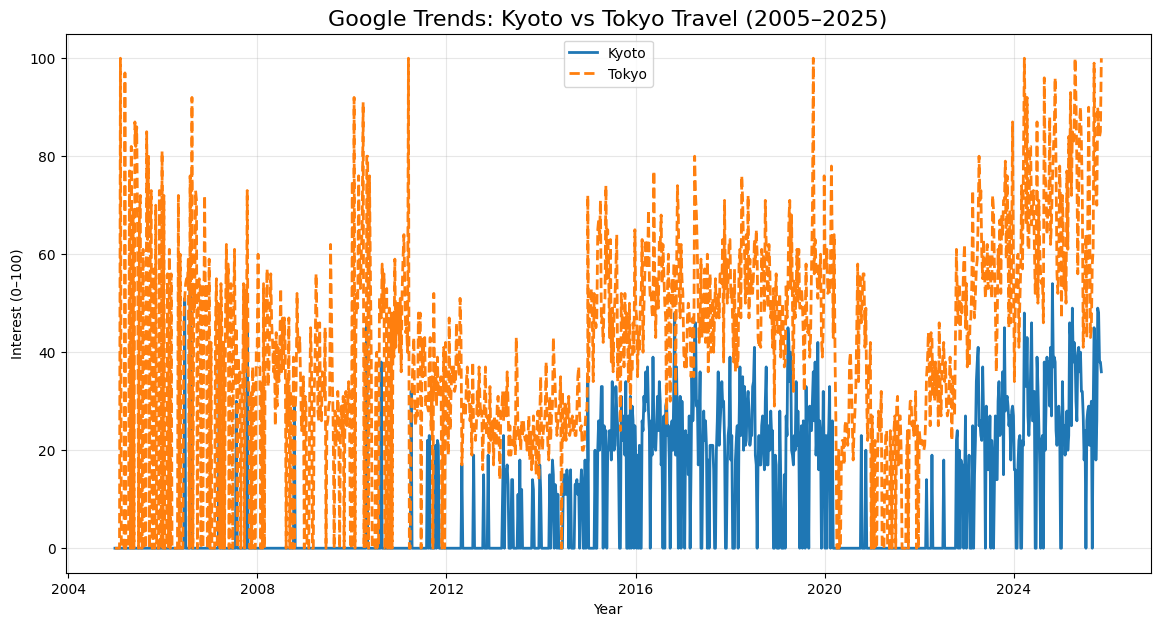

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV読み込み
df = pd.read_csv("../data/trends_long.csv")

# 不要列削除
if "isPartial" in df.columns:
    df = df.drop(columns=["isPartial"])

# 日付をdatetime型に変換
df["date"] = pd.to_datetime(df["date"])

# --- 可視化 ---
plt.figure(figsize=(14,7))
plt.plot(df["date"], df["Kyoto travel"], label="Kyoto", linewidth=2)
plt.plot(df["date"], df["Tokyo travel"], label="Tokyo", linewidth=2, linestyle="--")

plt.title("Google Trends: Kyoto vs Tokyo Travel (2005–2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Interest (0–100)")
plt.legend()
plt.grid(alpha=0.3)

# --- 重要イベント注釈 ---
plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle=":", alpha=0.7)
plt.text(pd.Timestamp("2020-06-01"), 95, "COVID-19", color="red", fontsize=11)

plt.axvline(pd.Timestamp("2011-03-01"), color="gray", linestyle=":", alpha=0.6)
plt.text(pd.Timestamp("2011-06-01"), 90, "Great East Japan Earthquake", color="gray", fontsize=10)

plt.axvline(pd.Timestamp("2021-07-01"), color="orange", linestyle=":", alpha=0.6)
plt.text(pd.Timestamp("2021-10-01"), 85, "Tokyo Olympics", color="orange", fontsize=10)

plt.show()

/tmp/ipykernel_34190/106892528.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_year = df.select_dtypes(include=["number"]).resample("Y").mean()


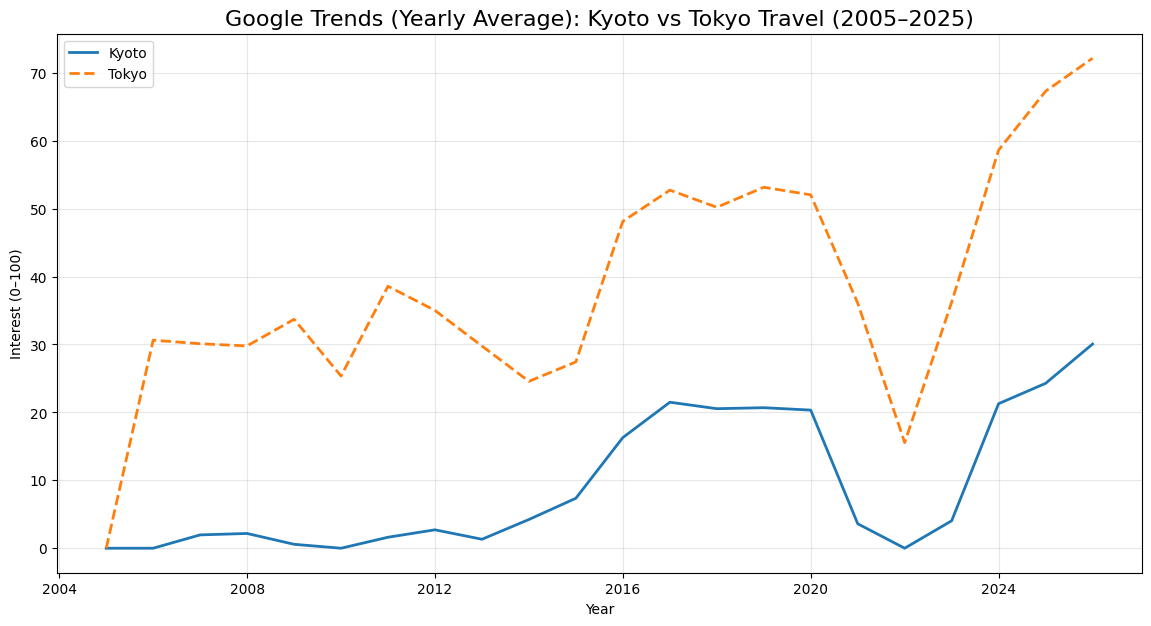

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/trends_long.csv")

# 不要列削除
if "isPartial" in df.columns:
    df = df.drop(columns=["isPartial"])
if "period" in df.columns:
    df = df.drop(columns=["period"])  # ← これが原因の一つ！

df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# 数値列だけを対象にして年単位で平均化
df_year = df.select_dtypes(include=["number"]).resample("Y").mean()

plt.figure(figsize=(14,7))
plt.plot(df_year.index, df_year["Kyoto travel"], label="Kyoto", linewidth=2)
plt.plot(df_year.index, df_year["Tokyo travel"], label="Tokyo", linewidth=2, linestyle="--")

plt.title("Google Trends (Yearly Average): Kyoto vs Tokyo Travel (2005–2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Interest (0–100)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

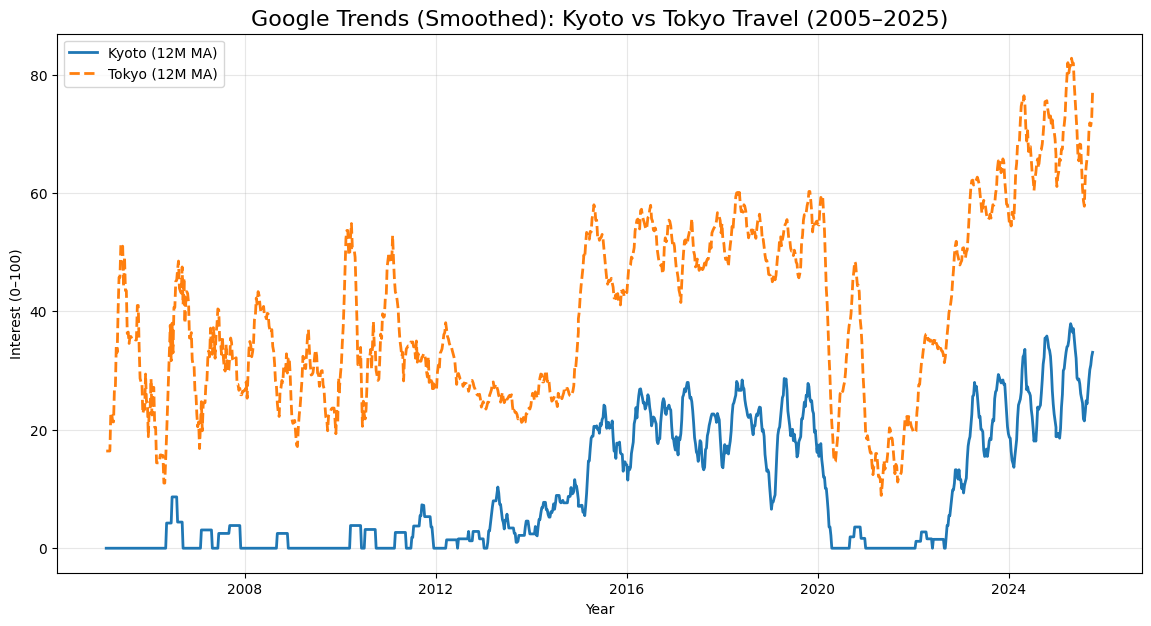

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV読み込み
df = pd.read_csv("../data/trends_long.csv")

# 不要列削除
if "isPartial" in df.columns:
    df = df.drop(columns=["isPartial"])

# 日付をdatetime型に変換
df["date"] = pd.to_datetime(df["date"])

df["Kyoto_smooth"] = df["Kyoto travel"].rolling(window=12, center=True).mean()
df["Tokyo_smooth"] = df["Tokyo travel"].rolling(window=12, center=True).mean()

plt.figure(figsize=(14,7))
plt.plot(df["date"], df["Kyoto_smooth"], label="Kyoto (12M MA)", linewidth=2)
plt.plot(df["date"], df["Tokyo_smooth"], label="Tokyo (12M MA)", linewidth=2, linestyle="--")
plt.title("Google Trends (Smoothed): Kyoto vs Tokyo Travel (2005–2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Interest (0–100)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()